## STA130 HW08
___

## 1.)

A **Classification Decision Tree** is a supervised machine learning algorithm used to classify data into distinct categories. It works by splitting the dataset into subsets based on the features that provide the most discriminatory power. This process is visually represented as a tree structure, where:
* Nodes represent decision points based on a feature.
* Edges represent the outcome of a decision.
* Leaves represent the final class labels.

Classification Decision Trees are used for problems where the goal is to assign data points to specific categories or labels based on input features. These problems involve categorical target variables, such as "Yes/No" or multi-class categories.

Some real-world applications include:
* Medical Diagnosis: Classifying whether a patient has a particular disease based on symptoms, test results, and demographic data (Predicting whether a patient has diabetes or not)
* Email Filtering: Classifying emails as spam or not spam based on their content and metadata.
* Loan Approval: Predicting whether a loan application should be approved or denied based on applicant financial history and demographics.

**Classification Decision Tree vs. Multiple Linear Regression**
* Classification Decision Tree predicts categories (e.g., "Yes" or "No") and outputs discrete values representing class labels. While Multiple Linear Regression predicts continuous numerical values and outputs a single, real-valued number.
* Classification Decision Tree uses a series of rules (splits) based on feature thresholds to navigate the tree and arrive at a class label. While Multiple Linear Regression models the relationship between input features and the target variable using a linear equation. 
* Overall, Classification Decision Trees are best for categorical outputs where relationships may be non-linear or hierarchical while Multiple Linear Regressions are best for numerical outputs and assumes a linear relationship between variables.

___
## 2.)

1. Accuracy

**Application Scenario**: General classification tasks with balanced datasets, such as predicting weather conditions (e.g., sunny vs. rainy).

**Rationale**: Accuracy is most useful when the dataset has an equal number of positive and negative examples and when the cost of misclassification (false positives or false negatives) is not significantly skewed. In balanced and low-risk scenarios, accuracy provides a straightforward measure of model performance.

2. Sensitivity (Recall)

**Application Scenario**: Medical diagnostics for critical diseases (e.g., cancer screening).

**Rationale**: Sensitivity is critical in situations where failing to identify a true positive (e.g., missing a cancer diagnosis) has severe consequences. A high sensitivity ensures most positive cases are identified, even at the cost of more false positives.

3. Specificity

**Application Scenario**: Fraud detection in financial systems (e.g., identifying legitimate transactions to avoid disruptions).

**Rationale**: Specificity is important when correctly identifying negatives (non-fraudulent transactions) is crucial to prevent unnecessary interruptions. A high specificity minimizes false alarms, ensuring genuine users are not falsely flagged.

4. Precision

**Application Scenario**: Spam email filtering.

**Rationale**: Precision is key when false positives (e.g., marking a legitimate email as spam) need to be minimized. A high precision ensures flagged emails are highly likely to be actual spam, reducing user frustration.



___
## 3.) 



In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 1: Remove columns Weight_oz, Width, and Height
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"], errors='ignore')

# Step 2: Drop rows with any remaining NaN entries
ab_cleaned = ab_reduced.dropna().copy()  # Explicitly create a copy to avoid warnings

# Step 3: Convert columns to specified data types
ab_cleaned["Pub year"] = ab_cleaned["Pub year"].astype(int)
ab_cleaned["NumPages"] = ab_cleaned["NumPages"].astype(int)
ab_cleaned["Hard_or_Paper"] = ab_cleaned["Hard_or_Paper"].astype("category")

# Step 4: Display summary of the cleaned dataset
print(ab_cleaned.head())
print(ab_cleaned.info())

                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P       304         Adams Media   
1       15.00         10.20             P       273          Free Press   
2        1.50          1.50             P        96  Dover Publications   
3       15.99         10.87             P       672    Harper Perennial   
4       30.50         16.77             P       720               Knopf   

   Pub year     ISBN-10  Thick  
0      2010  1605506249    0.8  
1      2008  1416564195    0.7  
2      1995

___
## 4.)



In [3]:
from sklearn.model_selection import train_test_split

# Assuming `ab_reduced_noNaN` is already created and cleaned
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_cleaned, test_size=0.2, random_state=42
)

# Report the number of observations in each set
print(f"Training set size: {len(ab_reduced_noNaN_train)} observations")
print(f"Test set size: {len(ab_reduced_noNaN_test)} observations")


Training set size: 255 observations
Test set size: 64 observations


[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [66, 189]\nclass = P'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.212\nsamples = 183\nvalue = [22, 161]\nclass = P'),
 Text(0.125, 0.16666666666666666, 'gini = 0.369\nsamples = 45\nvalue = [11, 34]\nclass = P'),
 Text(0.375, 0.16666666666666666, 'gini = 0.147\nsamples = 138\nvalue = [11, 127]\nclass = P'),
 Text(0.75, 0.5, 'List Price <= 27.275\ngini = 0.475\nsamples = 72\nvalue = [44, 28]\nclass = H'),
 Text(0.625, 0.16666666666666666, 'gini = 0.39\nsamples = 49\nvalue = [36, 13]\nclass = H'),
 Text(0.875, 0.16666666666666666, 'gini = 0.454\nsamples = 23\nvalue = [8, 15]\nclass = P')]

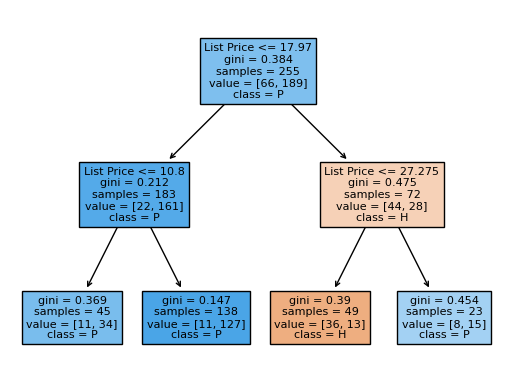

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Prepare the training data
X_train = ab_reduced_noNaN_train[["List Price"]]  # Feature
y_train = ab_reduced_noNaN_train["Hard_or_Paper"]  # Target

# Create the Decision Tree Classifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Visualize the tree
tree.plot_tree(clf, feature_names=["List Price"], class_names=clf.classes_, filled=True)


The tree plot shows:

1. Nodes: The decision points based on thresholds of the List Price.
2. Leaves: The final predictions for each range of List Price values.
3. Depth: The maximum tree depth is restricted to 2, ensuring simplicity and interpretability.


___
## 5.)


Here’s the process to fit and visualize a classification decision tree based on the new specifications:

Step 1: Prepare the Data
Use the specified features (NumPages, Thick, List Price) as X and Hard_or_Paper as the target variable (y):



In [6]:
# Prepare the data for training
X_train = ab_reduced_noNaN_train[["NumPages", "Thick", "List Price"]]  # Features
y_train = ab_reduced_noNaN_train["Hard_or_Paper"]  # Target

# Prepare the data for testing (if needed)
X_test = ab_reduced_noNaN_test[["NumPages", "Thick", "List Price"]]
y_test = ab_reduced_noNaN_test["Hard_or_Paper"]

Step 2: Fit the Decision Tree
Create and train a DecisionTreeClassifier with a maximum depth of 4:

In [8]:
# Create the Decision Tree Classifier
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the classifier
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

Step 3: Visualize the Tree
Visualize the decision tree to understand how predictions are made:



[Text(0.4342105263157895, 0.9, 'List Price <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [66, 189]\nclass = P'),
 Text(0.21052631578947367, 0.7, 'NumPages <= 82.0\ngini = 0.212\nsamples = 183\nvalue = [22, 161]\nclass = P'),
 Text(0.10526315789473684, 0.5, 'Thick <= 0.25\ngini = 0.408\nsamples = 7\nvalue = [5, 2]\nclass = H'),
 Text(0.05263157894736842, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = P'),
 Text(0.15789473684210525, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = H'),
 Text(0.3157894736842105, 0.5, 'Thick <= 1.65\ngini = 0.175\nsamples = 176\nvalue = [17, 159]\nclass = P'),
 Text(0.2631578947368421, 0.3, 'Thick <= 0.55\ngini = 0.166\nsamples = 175\nvalue = [16, 159]\nclass = P'),
 Text(0.21052631578947367, 0.1, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]\nclass = P'),
 Text(0.3157894736842105, 0.1, 'gini = 0.199\nsamples = 143\nvalue = [16, 127]\nclass = P'),
 Text(0.3684210526315789, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = H'),
 Text(0.6578

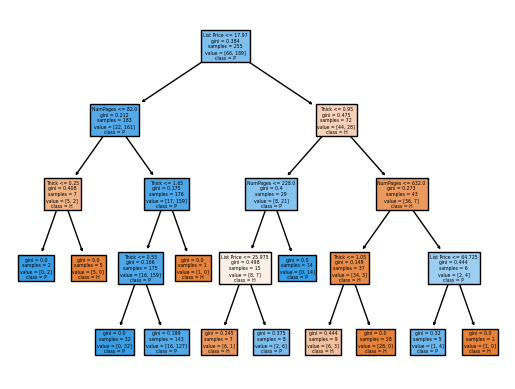

In [10]:
# Visualize the tree
tree.plot_tree(clf2, 
               feature_names=["NumPages", "Thick", "List Price"], 
               class_names=clf2.classes_, 
               filled=True)

In the visualized tree:

**Nodes**: Represent decision points where a split is made based on a threshold for one of the features (NumPages, Thick, or List Price).

**Splits**: At each node, the tree checks whether the value of a feature is above or below the threshold.

**Paths**: The tree follows the path determined by the feature thresholds until reaching a leaf node.

**Leaf Nodes**: Contain the predicted class label (Hard or Paper) and the proportion of samples for each class.


___
## 6.)

In [12]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target variable (y)
X = ab_cleaned[["NumPages", "Thick", "List Price"]]  # Features
y = ab_cleaned["Hard_or_Paper"]  # Target variable

# Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, check the size of the datasets
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Training set size: 255
Test set size: 64


In [13]:
from sklearn.tree import DecisionTreeClassifier

# Initialize classifiers
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train clf using only "List Price"
clf.fit(X_train[["List Price"]], y_train)

# Train clf2 using "NumPages", "Thick", and "List Price"
clf2.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [14]:
# Predict using clf (using "List Price" only)
y_pred_clf = clf.predict(X_test[["List Price"]])

# Predict using clf2 (using "NumPages", "Thick", and "List Price")
y_pred_clf2 = clf2.predict(X_test)


In [15]:
from sklearn.metrics import confusion_matrix

# Confusion matrices for both models
cm_clf = confusion_matrix(y_test, y_pred_clf, labels=clf.classes_)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2, labels=clf2.classes_)

print("Confusion Matrix for clf (using 'List Price'):")
print(cm_clf)

print("Confusion Matrix for clf2 (using 'NumPages', 'Thick', 'List Price'):")
print(cm_clf2)


Confusion Matrix for clf (using 'List Price'):
[[18  2]
 [ 7 37]]
Confusion Matrix for clf2 (using 'NumPages', 'Thick', 'List Price'):
[[15  5]
 [ 4 40]]


In [16]:
from sklearn.metrics import accuracy_score

# Sensitivity, Specificity, and Accuracy for clf
tn_clf, fp_clf, fn_clf, tp_clf = cm_clf.ravel()
sensitivity_clf = tp_clf / (tp_clf + fn_clf)  # True Positive Rate
specificity_clf = tn_clf / (tn_clf + fp_clf)  # True Negative Rate
accuracy_clf = accuracy_score(y_test, y_pred_clf)

# Sensitivity, Specificity, and Accuracy for clf2
tn_clf2, fp_clf2, fn_clf2, tp_clf2 = cm_clf2.ravel()
sensitivity_clf2 = tp_clf2 / (tp_clf2 + fn_clf2)  # True Positive Rate
specificity_clf2 = tn_clf2 / (tn_clf2 + fp_clf2)  # True Negative Rate
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)

# Print results
print("\nMetrics for clf (using 'List Price'):")
print(f"Sensitivity: {sensitivity_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}")
print(f"Accuracy: {accuracy_clf:.2f}")

print("\nMetrics for clf2 (using 'NumPages', 'Thick', 'List Price'):")
print(f"Sensitivity: {sensitivity_clf2:.2f}")
print(f"Specificity: {specificity_clf2:.2f}")
print(f"Accuracy: {accuracy_clf2:.2f}")



Metrics for clf (using 'List Price'):
Sensitivity: 0.84
Specificity: 0.90
Accuracy: 0.86

Metrics for clf2 (using 'NumPages', 'Thick', 'List Price'):
Sensitivity: 0.91
Specificity: 0.75
Accuracy: 0.86


___
## 7.)

The key difference between the two confusion matrices is the set of features used to train the model. The first matrix uses only the `List Price` feature, while the second includes additional features like `NumPages` and `Thick`. The second model's inclusion of more relevant features likely improves prediction accuracy, reducing false positives and false negatives, resulting in a more balanced confusion matrix. Consequently, the second model performs better, as it captures more information, while the first model's reliance on a single feature leads to less accurate results.

___
## 8.)



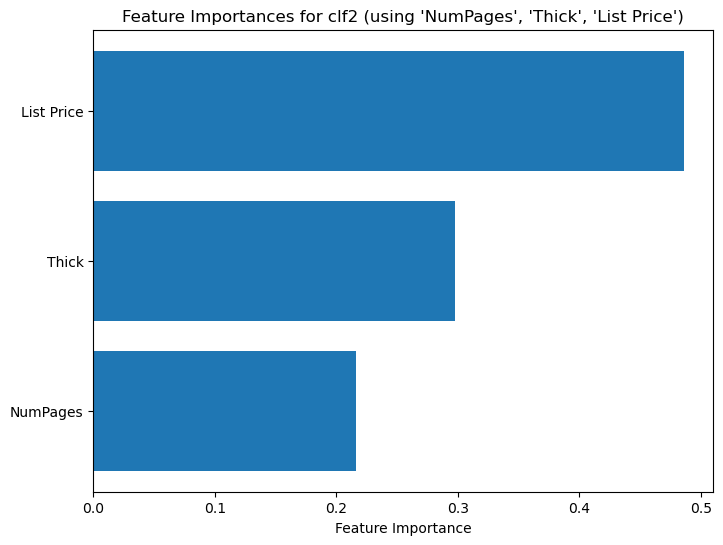

In [20]:
import matplotlib.pyplot as plt

# Get the feature importances from clf2
importances = clf2.feature_importances_

# Get the names of the features used in the model
feature_names = clf2.feature_names_in_

# Create a bar plot of feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importances for clf2 (using 'NumPages', 'Thick', 'List Price')")
plt.show()


In [21]:
# Identify the most important feature
most_important_feature = feature_names[importances.argmax()]
print(f"The most important predictor variable for clf2 is: {most_important_feature}")


The most important predictor variable for clf2 is: List Price


___
## 9.)

In linear regression, coefficients indicate the direct, linear relationship between each predictor and the target variable, with their magnitude showing the strength and direction of the effect. In contrast, feature importances in decision trees measure how much each predictor helps reduce impurity at decision nodes, without assuming a linear relationship. Thus, while linear regression coefficients provide a clear interpretation of individual variable effects, feature importances in decision trees capture the relative significance of features in complex, non-linear decision-making.

___

## 10.)

Somewhat.

___
# ChatGPT Chat Log Summary:

## Classification Tree vs Linear Regression

https://chatgpt.com/share/673e8e51-0df0-8011-bdab-d4e13f13d2f4